In [92]:
%load_ext autoreload
%autoreload 2

import sys

import math
import random
import pickle
from collections import defaultdict


%aimport torch
from torch import nn
import matplotlib.pyplot as plt


from neuralnetworks.feedforward import Feedforward
from neuralnetworks.functions import ReLU, Sigmoid, MSE, Tanh
from neuralnetworks.sequential import Sequential
from optimizer.sgd import SGD
from datagenerator.datagenerator import DataGenerator


Tensor = torch.Tensor
sys.path.insert(0, "../")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Useful Functions

In [14]:
def print_y_vs_yhat(X, y, y_hat=None):
    
    if y_hat is not None:
        fig, axes = plt.subplots(1, 2)
        axes[0].scatter(X[:, 0], X[:, 1], c=y)
        axes[0].set_title("Ground truth")
        axes[1].scatter(X[:, 0], X[:, 1], c=y_hat)
        axes[1].set_title("Predicted")
    else:
        fig, axes = plt.subplots(1, 1)
        axes.scatter(X[:, 0], X[:, 1], c=y)
        axes.set_title("Ground truth")
        axes.legend(['1', '0'])

In [15]:
def print_learning_curves(loss_history_train, loss_history_test, accuracy_history_train, accuracy_history_test):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].plot(loss_history_train, label='train')
    axes[0].plot(loss_history_test, label='test')
    axes[0].set_xlabel("epochs")
    axes[0].set_ylabel("Loss")
    axes[0].legend(title='set')

    axes[1].plot(accuracy_history_train, label='train')
    axes[1].plot(accuracy_history_test, label='test')
    axes[1].set_xlabel("epochs")
    axes[1].set_ylabel("% accuracy")
    axes[1].legend(title='set')
    plt.show()
    return fig

# Data generator

In [95]:
dg = DataGenerator(1000)
X_train, y_train, X_test, y_test = dg.get_data()

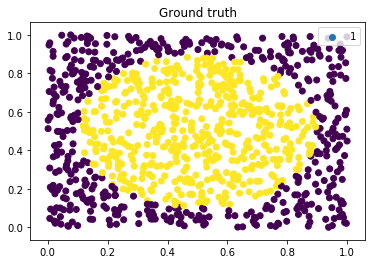

In [96]:
print_y_vs_yhat(X_train, y_train.argmax(axis=1))

# Xor test 

In [22]:
x_tr = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]]).float()
y_tr = torch.tensor([[1, 0], [0, 1], [0, 1], [1, 0]]).float()

In [23]:
xor_model = Sequential()

xor_model.add(Feedforward(2, 14))
xor_model.add(ReLU())
xor_model.add(Feedforward(14, 2))
xor_model.add(Tanh())
optimizer = SGD(0.01)
loss = MSE()

In [24]:
loss_history = []

for e in range(2000):
    loss_stack = 0.
    counter = 0
    for val, tar in zip(x_tr, y_tr):
        output = xor_model.forward(val)
        loss(output, tar)
        loss_stack += loss.value
        if output.abs().argmax() == tar.argmax():
            counter += 1
        xor_model.backward(loss)
        optimizer.step(xor_model)
        optimizer.zero_grad(xor_model)
    l = loss_stack / X_train.size(0)
    print("epoch: ", e, "| loss: ", l, " | accuracy: ", counter / x_tr.size(0))
    loss_history.append(l)

epoch:  0 | loss:  tensor(0.0053)  | accuracy:  0.5
epoch:  1 | loss:  tensor(0.0051)  | accuracy:  0.5
epoch:  2 | loss:  tensor(0.0049)  | accuracy:  0.5
epoch:  3 | loss:  tensor(0.0048)  | accuracy:  0.5
epoch:  4 | loss:  tensor(0.0046)  | accuracy:  0.5
epoch:  5 | loss:  tensor(0.0045)  | accuracy:  0.5
epoch:  6 | loss:  tensor(0.0043)  | accuracy:  0.5
epoch:  7 | loss:  tensor(0.0042)  | accuracy:  0.5
epoch:  8 | loss:  tensor(0.0041)  | accuracy:  0.5
epoch:  9 | loss:  tensor(0.0040)  | accuracy:  0.5
epoch:  10 | loss:  tensor(0.0039)  | accuracy:  0.5
epoch:  11 | loss:  tensor(0.0038)  | accuracy:  0.5
epoch:  12 | loss:  tensor(0.0037)  | accuracy:  0.5
epoch:  13 | loss:  tensor(0.0036)  | accuracy:  0.5
epoch:  14 | loss:  tensor(0.0036)  | accuracy:  0.5
epoch:  15 | loss:  tensor(0.0035)  | accuracy:  0.5
epoch:  16 | loss:  tensor(0.0035)  | accuracy:  0.5
epoch:  17 | loss:  tensor(0.0034)  | accuracy:  0.25
epoch:  18 | loss:  tensor(0.0034)  | accuracy:  0.25
e

epoch:  161 | loss:  tensor(0.0026)  | accuracy:  0.25
epoch:  162 | loss:  tensor(0.0026)  | accuracy:  0.25
epoch:  163 | loss:  tensor(0.0026)  | accuracy:  0.5
epoch:  164 | loss:  tensor(0.0026)  | accuracy:  0.5
epoch:  165 | loss:  tensor(0.0026)  | accuracy:  0.5
epoch:  166 | loss:  tensor(0.0026)  | accuracy:  0.5
epoch:  167 | loss:  tensor(0.0026)  | accuracy:  0.5
epoch:  168 | loss:  tensor(0.0026)  | accuracy:  0.5
epoch:  169 | loss:  tensor(0.0026)  | accuracy:  0.5
epoch:  170 | loss:  tensor(0.0026)  | accuracy:  0.5
epoch:  171 | loss:  tensor(0.0026)  | accuracy:  0.5
epoch:  172 | loss:  tensor(0.0026)  | accuracy:  0.5
epoch:  173 | loss:  tensor(0.0025)  | accuracy:  0.5
epoch:  174 | loss:  tensor(0.0025)  | accuracy:  0.5
epoch:  175 | loss:  tensor(0.0025)  | accuracy:  0.5
epoch:  176 | loss:  tensor(0.0025)  | accuracy:  0.5
epoch:  177 | loss:  tensor(0.0025)  | accuracy:  0.5
epoch:  178 | loss:  tensor(0.0025)  | accuracy:  0.5
epoch:  179 | loss:  tenso

epoch:  321 | loss:  tensor(0.0023)  | accuracy:  0.75
epoch:  322 | loss:  tensor(0.0023)  | accuracy:  0.75
epoch:  323 | loss:  tensor(0.0023)  | accuracy:  0.75
epoch:  324 | loss:  tensor(0.0023)  | accuracy:  0.75
epoch:  325 | loss:  tensor(0.0023)  | accuracy:  0.75
epoch:  326 | loss:  tensor(0.0023)  | accuracy:  0.75
epoch:  327 | loss:  tensor(0.0023)  | accuracy:  0.75
epoch:  328 | loss:  tensor(0.0023)  | accuracy:  0.75
epoch:  329 | loss:  tensor(0.0023)  | accuracy:  0.75
epoch:  330 | loss:  tensor(0.0023)  | accuracy:  0.75
epoch:  331 | loss:  tensor(0.0023)  | accuracy:  0.75
epoch:  332 | loss:  tensor(0.0023)  | accuracy:  0.75
epoch:  333 | loss:  tensor(0.0023)  | accuracy:  0.75
epoch:  334 | loss:  tensor(0.0023)  | accuracy:  0.75
epoch:  335 | loss:  tensor(0.0022)  | accuracy:  0.75
epoch:  336 | loss:  tensor(0.0022)  | accuracy:  0.75
epoch:  337 | loss:  tensor(0.0022)  | accuracy:  0.75
epoch:  338 | loss:  tensor(0.0022)  | accuracy:  0.75
epoch:  33

epoch:  496 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  497 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  498 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  499 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  500 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  501 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  502 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  503 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  504 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  505 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  506 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  507 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  508 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  509 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  510 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  511 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  512 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  513 | loss:  tensor(0.0021)  | accuracy:  0.75
epoch:  51

epoch:  665 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  666 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  667 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  668 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  669 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  670 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  671 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  672 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  673 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  674 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  675 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  676 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  677 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  678 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  679 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  680 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  681 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  682 | loss:  tensor(0.0020)  | accuracy:  0.75
epoch:  68

epoch:  844 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  845 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  846 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  847 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  848 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  849 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  850 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  851 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  852 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  853 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  854 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  855 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  856 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  857 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  858 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  859 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  860 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  861 | loss:  tensor(0.0017)  | accuracy:  0.75
epoch:  86

epoch:  1018 | loss:  tensor(0.0014)  | accuracy:  0.75
epoch:  1019 | loss:  tensor(0.0014)  | accuracy:  0.75
epoch:  1020 | loss:  tensor(0.0014)  | accuracy:  0.75
epoch:  1021 | loss:  tensor(0.0014)  | accuracy:  0.75
epoch:  1022 | loss:  tensor(0.0014)  | accuracy:  0.75
epoch:  1023 | loss:  tensor(0.0014)  | accuracy:  0.75
epoch:  1024 | loss:  tensor(0.0014)  | accuracy:  0.75
epoch:  1025 | loss:  tensor(0.0014)  | accuracy:  0.75
epoch:  1026 | loss:  tensor(0.0013)  | accuracy:  0.75
epoch:  1027 | loss:  tensor(0.0013)  | accuracy:  0.75
epoch:  1028 | loss:  tensor(0.0013)  | accuracy:  0.75
epoch:  1029 | loss:  tensor(0.0013)  | accuracy:  0.75
epoch:  1030 | loss:  tensor(0.0013)  | accuracy:  0.75
epoch:  1031 | loss:  tensor(0.0013)  | accuracy:  0.75
epoch:  1032 | loss:  tensor(0.0013)  | accuracy:  0.75
epoch:  1033 | loss:  tensor(0.0013)  | accuracy:  0.75
epoch:  1034 | loss:  tensor(0.0013)  | accuracy:  0.75
epoch:  1035 | loss:  tensor(0.0013)  | accuracy

epoch:  1182 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1183 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1184 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1185 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1186 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1187 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1188 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1189 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1190 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1191 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1192 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1193 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1194 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1195 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1196 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1197 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1198 | loss:  tensor(0.0012)  | accuracy:  0.75
epoch:  1199 | loss:  tensor(0.0012)  | accuracy

epoch:  1342 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1343 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1344 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1345 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1346 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1347 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1348 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1349 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1350 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1351 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1352 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1353 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1354 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1355 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1356 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1357 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1358 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1359 | loss:  tensor(0.0011)  | accuracy

epoch:  1529 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1530 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1531 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1532 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1533 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1534 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1535 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1536 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1537 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1538 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1539 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1540 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1541 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1542 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1543 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1544 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1545 | loss:  tensor(0.0011)  | accuracy:  0.75
epoch:  1546 | loss:  tensor(0.0011)  | accuracy

epoch:  1693 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1694 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1695 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1696 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1697 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1698 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1699 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1700 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1701 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1702 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1703 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1704 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1705 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1706 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1707 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1708 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1709 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1710 | loss:  tensor(0.0010)  | accuracy

epoch:  1875 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1876 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1877 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1878 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1879 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1880 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1881 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1882 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1883 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1884 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1885 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1886 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1887 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1888 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1889 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1890 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1891 | loss:  tensor(0.0010)  | accuracy:  0.75
epoch:  1892 | loss:  tensor(0.0010)  | accuracy

In [25]:
## Test that work for Xor problem

counter = 0
for i in range(100):
    rd = random.randint(0, 3)
    output = xor_model.forward(x_tr[rd])
    target = y_tr[rd]
    y_hat = output.abs().argmax().item()
    y = target.argmax().item()
    
#     print("y: {} | y_hat: {}".format(y, y_hat))
    if y_hat == y:
        counter += 1
    
print("xor_model accuracy: ", counter)

xor_model accuracy:  77


# Testing

In [97]:
### Working model
mlp = Sequential()
mlp.add(Feedforward(2, 25))
mlp.add(Tanh())
mlp.add(Feedforward(25, 25))
mlp.add(Tanh())
mlp.add(Feedforward(25, 25))
mlp.add(Tanh())
mlp.add(Feedforward(25, 2))
mlp.add(Tanh())
lr = 0.01
optimizer = SGD(lr)

loss = MSE()

In [93]:
### Working model
mlp = Sequential()
mlp.add(Feedforward(2, 25))
mlp.add(ReLU())
mlp.add(Feedforward(25, 25))
mlp.add(ReLU())
mlp.add(Feedforward(25, 25))
mlp.add(ReLU())
mlp.add(Feedforward(25, 2))
mlp.add(Tanh())
lr = 0.001
optimizer = SGD(lr)

loss = MSE()

In [98]:
def training(mlp, optimizer, loss, epochs):
    loss_history_train = []
    loss_history_test = []
    accuracy_history_train = []
    accuracy_history_test = []
    gradient_checker = defaultdict(list)

    for e in range(epochs):
        correct_train = 0
        correct_test = 0
        loss_stack_train = 0.
        loss_stack_test = 0.

        # Training
        for i, (val, tar) in enumerate(zip(X_train, y_train)):
            optimizer.zero_grad(mlp)
            output = mlp.forward(val)
            loss(output, tar)
            if output.abs().argmax() == tar.argmax():
                correct_train += 1  
            loss_stack_train += loss.value.item()
            mlp.backward(loss)
            optimizer.step(mlp)


        # Gradient Checker:
        for i, l in enumerate(mlp.param()):
            if l != []:
                gradient_checker["layer{}_w".format(i)].append(l[1].mean().item())
                gradient_checker["layer{}_b".format(i)].append(l[3].mean().item())

        # Testing
        for val, tar in zip(X_test, y_test):
            output = mlp.forward(val)
            loss(output, tar)
            if output.abs().argmax() == tar.argmax():
                correct_test += 1  
            loss_stack_test += loss.value.item()

        # Metrics evaluation and printing
        l_train = loss_stack_train / X_train.shape[0]
        l_test = loss_stack_test / X_test.shape[0]
        acc_train = correct_train / X_train.shape[0]
        acc_test = correct_test / X_test.shape[0]

        accuracy_history_train.append(acc_train)
        accuracy_history_test.append(acc_test)
        loss_history_train.append(l_train)
        loss_history_test.append(l_test)

        print("epoch: ", e, "| train_loss: ", l_train, " | train_acc: ", acc_train, " | test_loss: ", l_test, " | test_acc: ", acc_test)
    return loss_history_train, loss_history_test, accuracy_history_train, accuracy_history_test
epochs = 40
loss_history_train, loss_history_test, accuracy_history_train, accuracy_history_test = training(mlp, optimizer, loss, epochs)


epoch:  0 | train_loss:  0.6181861482928507  | train_acc:  0.553  | test_loss:  0.48324452205747365  | test_acc:  0.613
epoch:  1 | train_loss:  0.47734657335234804  | train_acc:  0.654  | test_loss:  0.41372400549706073  | test_acc:  0.709
epoch:  2 | train_loss:  0.42797949592687656  | train_acc:  0.704  | test_loss:  0.39205911255674436  | test_acc:  0.716
epoch:  3 | train_loss:  0.40834241305914476  | train_acc:  0.718  | test_loss:  0.3772879949659109  | test_acc:  0.732
epoch:  4 | train_loss:  0.393580294722502  | train_acc:  0.725  | test_loss:  0.3594146754778922  | test_acc:  0.755
epoch:  5 | train_loss:  0.37336478794552386  | train_acc:  0.725  | test_loss:  0.32665802430454643  | test_acc:  0.802
epoch:  6 | train_loss:  0.3360715238226112  | train_acc:  0.751  | test_loss:  0.2764245525933802  | test_acc:  0.854
epoch:  7 | train_loss:  0.29385857441159896  | train_acc:  0.796  | test_loss:  0.2360807639788836  | test_acc:  0.917
epoch:  8 | train_loss:  0.2646532016195

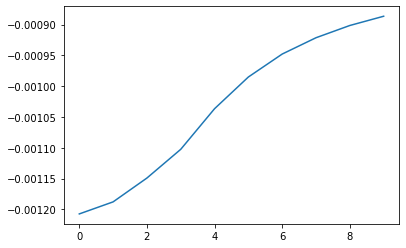

In [58]:
plt.plot(gradient_checker['layer0_w'])

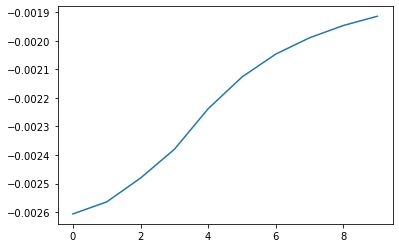

In [59]:
plt.plot(gradient_checker['layer0_b'])

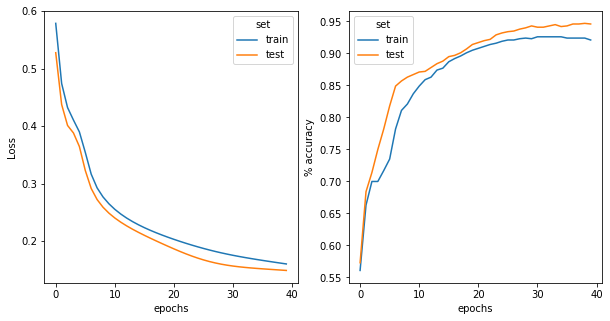

In [71]:
tanh = print_learning_curves(loss_history_train_tanh, loss_history_test_tanh,
                             accuracy_history_train_tanh, accuracy_history_test_tanh)

In [72]:
tanh.savefig("figures/tanh_3layers")

In [49]:
## Tanh activation
loss_history_train_tanh = loss_history_train
loss_history_test_tanh = loss_history_test
accuracy_history_train_tanh = accuracy_history_train
accuracy_history_test_tanh = accuracy_history_test

In [37]:
loss_history_train_relu = loss_history_train
loss_history_test_relu = loss_history_test
accuracy_history_train_relu = accuracy_history_train
accuracy_history_test_relu = accuracy_history_test

In [2]:


# # Save
# with open("loss_history_train_tanh.txt", "wb") as f:   #Pickling
#     pickle.dump(loss_history_train_tanh, f)
    
# with open("loss_history_test_tanh.txt", "wb") as f:   #Pickling
#     pickle.dump(loss_history_test_tanh, f)

# with open("accuracy_history_train_tanh.txt", "wb") as f:   #Pickling
#     pickle.dump(accuracy_history_train_tanh, f)
    
# with open("accuracy_history_test_tanh.txt", "wb") as f:   #Pickling
#     pickle.dump(accuracy_history_test_tanh, f)


# Load
with open("loss_history_train_tanh.txt", "rb") as fp:   # Unpickling
    loss_history_train_tanh = pickle.load(fp)
    
with open("loss_history_test_tanh.txt", "rb") as fp:   # Unpickling
    loss_history_test_tanh = pickle.load(fp)

with open("accuracy_history_train_tanh.txt", "rb") as fp:   # Unpickling
    accuracy_history_train_tanh = pickle.load(fp)
    
with open("accuracy_history_test_tanh.txt", "rb") as fp:   # Unpickling
    accuracy_history_test_tanh = pickle.load(fp)

EOFError: Ran out of input

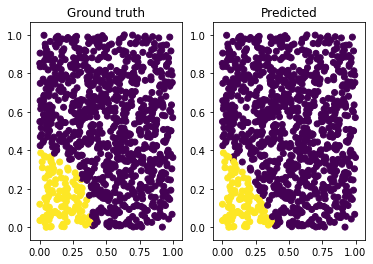

In [27]:
print_y_vs_yhat(X_test, y_test.argmax(axis=1), y_preds)

# Torch module

In [77]:
import torch
import torch.nn as nn
from torch.optim import SGD
torch.manual_seed(0)

In [83]:
class pytorch_mlp(nn.Module):
    def __init__(self):
        super(pytorch_mlp, self).__init__()
        self.lin1 = nn.Linear(2, 25)
        self.lin2 = nn.Linear(25, 25)
#         self.lin3 = nn.Linear(25, 25)
        self.lin4 = nn.Linear(25, 2)
        self.activation = nn.Tanh()
        self.last_activation = nn.Tanh()
    
    def forward(self, x):
        x = self.activation(self.lin1(x))
        x = self.activation(self.lin2(x))
#         x = self.activation(self.lin3(x))
        x = self.last_activation(self.lin4(x))
        return x

In [84]:
torch_mlp = pytorch_mlp()
epochs = 40
lr = 0.01
optimizer = SGD(torch_mlp.parameters(), lr)
criterion = nn.MSELoss()

In [85]:
loss_history_train = []
loss_history_test = []
accuracy_history_train = []
accuracy_history_test = []

for e in range(epochs):
    correct_train = 0
    correct_test = 0
    loss_stack_train = 0.
    loss_stack_test = 0.
    
    # Training
    for val, tar in zip(X_train, y_train):
        optimizer.zero_grad()
        output = torch_mlp(val)
        loss = criterion(output, tar)
        loss_stack_train += loss
        loss.backward()
        optimizer.step()
        if output.abs().argmax() == tar.argmax():
            correct_train += 1  
       
    # Testing
    for val, tar in zip(X_test, y_test):
        output = torch_mlp(val)
        loss = criterion(output, tar)
        loss_stack_test += loss
        if output.abs().argmax() == tar.argmax():
            correct_test += 1  
    
    l_train = loss_stack_train / X_train.shape[0]
    l_test = loss_stack_test / X_test.shape[0]
    acc_train = correct_train / X_train.shape[0]
    acc_test = correct_test / X_test.shape[0]

    
    loss_history_train.append(l_train)
    loss_history_test.append(l_test)
    accuracy_history_train.append(acc_train)
    accuracy_history_test.append(acc_test)
    print("epoch: ", e, "| train_loss: ", l_train.item(), " | train_acc: ",
              acc_train, " | test_loss: ", l_test.item(), " | test_acc: ", acc_test)


epoch:  0 | train_loss:  0.254541277885437  | train_acc:  0.523  | test_loss:  0.25005656480789185  | test_acc:  0.447
epoch:  1 | train_loss:  0.250851035118103  | train_acc:  0.53  | test_loss:  0.24951694905757904  | test_acc:  0.455
epoch:  2 | train_loss:  0.25014767050743103  | train_acc:  0.528  | test_loss:  0.24905285239219666  | test_acc:  0.455
epoch:  3 | train_loss:  0.2495201975107193  | train_acc:  0.542  | test_loss:  0.24856989085674286  | test_acc:  0.466
epoch:  4 | train_loss:  0.2488844245672226  | train_acc:  0.542  | test_loss:  0.2480175495147705  | test_acc:  0.48
epoch:  5 | train_loss:  0.24818111956119537  | train_acc:  0.547  | test_loss:  0.24734903872013092  | test_acc:  0.486
epoch:  6 | train_loss:  0.24734853208065033  | train_acc:  0.553  | test_loss:  0.24650663137435913  | test_acc:  0.497
epoch:  7 | train_loss:  0.24630536139011383  | train_acc:  0.565  | test_loss:  0.24540655314922333  | test_acc:  0.514
epoch:  8 | train_loss:  0.24492536485195

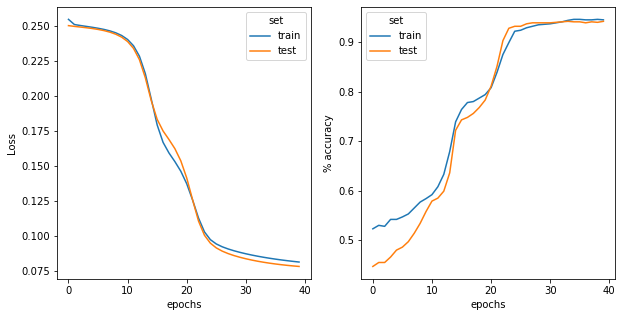

In [73]:
pytorch_relu = print_learning_curves(loss_history_train,
    loss_history_test,
    accuracy_history_train,
    accuracy_history_test)

In [75]:
pytorch_tanh.savefig("figures/pytorch_tanh_3layers")

In [86]:
pytorch_loss_history_train_tanh = loss_history_train
pytorch_loss_history_test_tanh = loss_history_test
pytorch_accuracy_history_train_tanh = accuracy_history_train
pytorch_accuracy_history_test_tanh = accuracy_history_test

In [81]:
pytorch_loss_history_train_relu = loss_history_train
pytorch_loss_history_test_relu = loss_history_test
pytorch_accuracy_history_train_relu = accuracy_history_train
pytorch_accuracy_history_test_relu = accuracy_history_test

# Framework | activation comparison

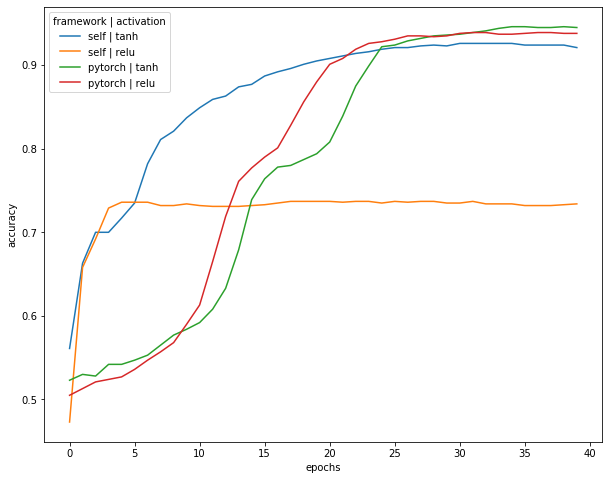

In [87]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(accuracy_history_train_tanh, label='self | tanh')
ax.plot(accuracy_history_train_relu, label='self | relu')
ax.plot(pytorch_accuracy_history_train_tanh, label='pytorch | tanh')
ax.plot(pytorch_accuracy_history_train_relu, label='pytorch | relu')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend(title='framework | activation')


In [70]:
fig.savefig("figures/framwork_activation comparison")